SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64
(50000, 6)
       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt        Price
0            2126         4          1        Rural       1969  215355.2836
1            2459         3          2        Rural       1980  195014.2216
2            1860         2          1       Suburb       1970  306891.0121
3            2294         2          1        Urban       1996  206786.7872
4            2130         5          2       Suburb       2001  272436.2391
...           ...       ...        ...          ...        ...          ...
49995        1282         5          3        Rural       1975  100080.8659
49996        2854         2          2       Suburb       1988  374507.6567
49997        2979         5          3       Suburb       1962  384110.5556
49998        2596         5          2        Rural       1984  380512.6860
49999        1572         5     

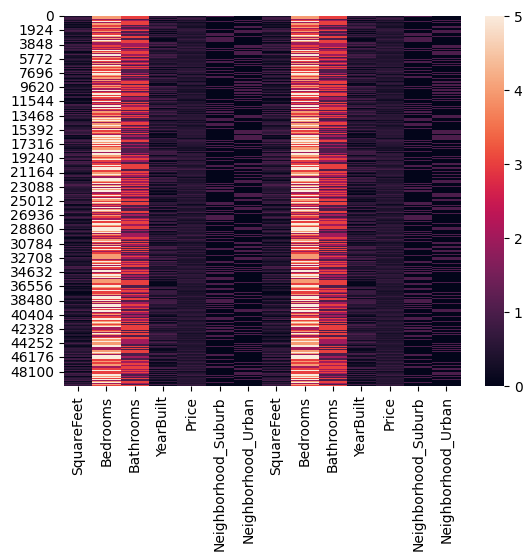

Outliers in SquareFeet: Series([], Name: SquareFeet, dtype: int64)


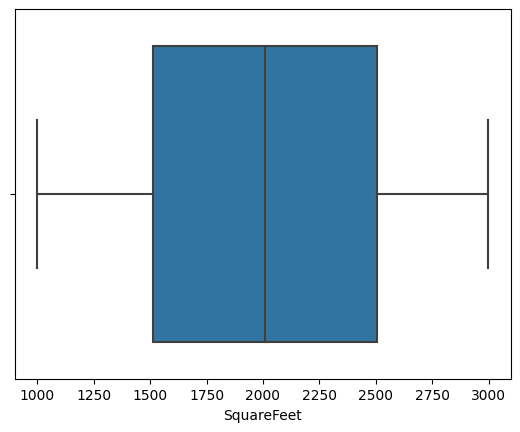

Outliers in Bedrooms: Series([], Name: Bedrooms, dtype: int64)


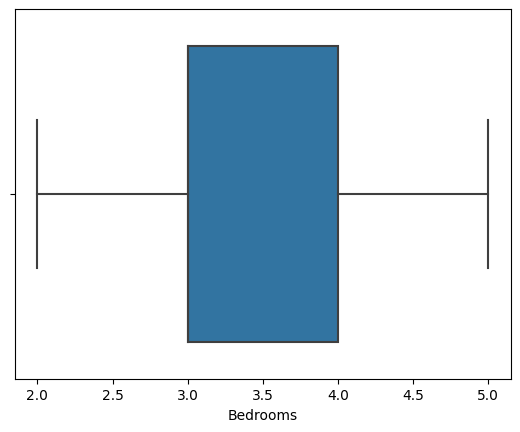

Outliers in Bathrooms: Series([], Name: Bathrooms, dtype: int64)


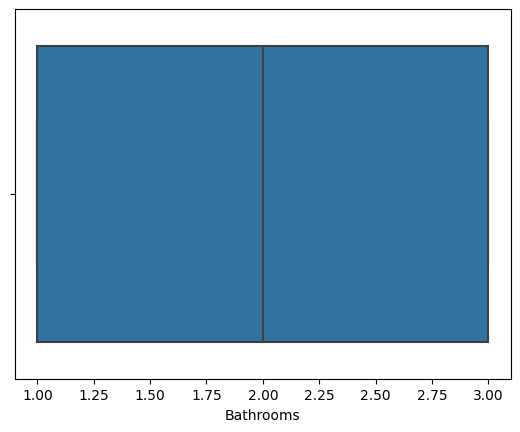

Outliers in YearBuilt: Series([], Name: YearBuilt, dtype: int64)


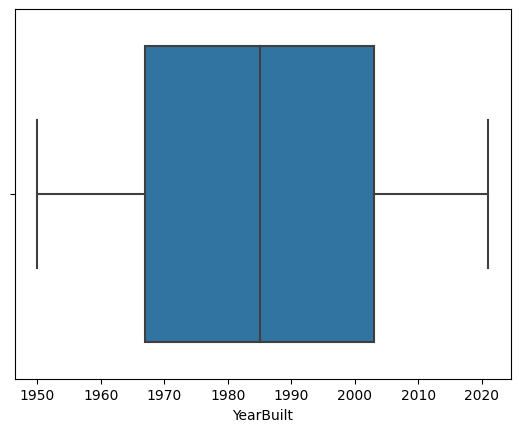


Top Features:
                Feature  Mutual_Info_Score
0            SquareFeet           0.409207
6            SquareFeet           0.408855
2             Bathrooms           0.004401
8             Bathrooms           0.004401
1              Bedrooms           0.002168
7              Bedrooms           0.002168
3             YearBuilt           0.000000
4   Neighborhood_Suburb           0.000000
5    Neighborhood_Urban           0.000000
9             YearBuilt           0.000000
10  Neighborhood_Suburb           0.000000
11   Neighborhood_Urban           0.000000

Model Building with Support Vector Regression (SVR)
Mean Squared Error: 5254015047.009619
R-squared: 0.08465893089231757

Model Building with Linear Regression
Mean Squared Error: 2436249371.291204
R-squared: 0.5755628630337024

Model Building with KNN Regressor
Mean Squared Error: 2702039531.549117
R-squared: 0.5292575808310466

Model Building with Decision Tree Regressor
Mean Squared Error: 5255710808.120528
R-squared: 

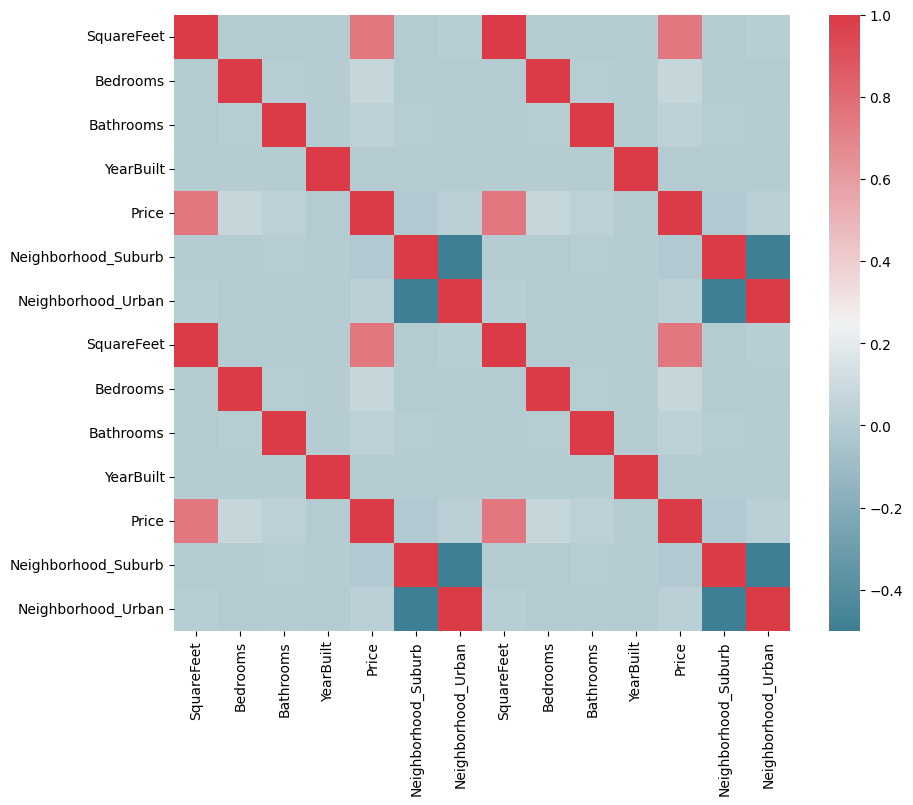

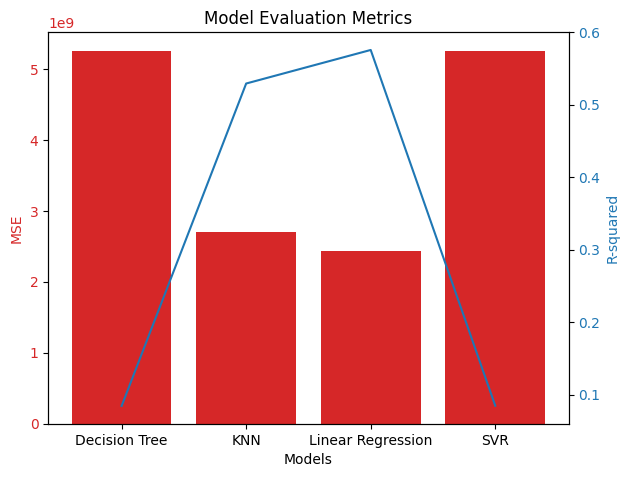

In [11]:
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sn
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score,classification_report,roc_curve, auc, confusion_matrix
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge



#  Data Exploration and Preprocessing:

# Reading the dataset

raw_data = pd.read_csv('housing.csv')
raw_data.head()

# Returns all columns and shows the sum of null values in each column
print(raw_data.isnull().sum())
print(raw_data.shape)

# Create a DataFrame
df = pd.DataFrame(raw_data)
print(df)


# Encoding Categorical Variables with One-Hot Encoding
# Apply One-Hot Encoding to the categorical columns
df = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True)

# Concatenate the one-hot encoded columns with the original DataFrame
df_concat = pd.concat([df, df], axis=1)
print('\nEncoded Dataset')
print(df_concat)

# Scaling Numerical Variables
# Using Min-Max Scaling
scaler = MinMaxScaler()
df_concat[['SquareFeet','YearBuilt','Price']] = scaler.fit_transform(df_concat[['SquareFeet','YearBuilt','Price']])

print('Scaling Dataset')
print(df_concat)

# plotting the heatmap
hm = sn.heatmap(data = df_concat)

# displaying the plotted heatmap
plt.show()

# Checking for outliers

# Assuming df is your DataFrame and columns are the columns of interest
columns_of_interest = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']

# Create a boxplot for each column to visualize outliers
for column in columns_of_interest:
    # Calculate quartiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = (df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)

    # Print and visualize outliers
    outlier_values = df.loc[outliers, column]
    print(f"Outliers in {column}:", outlier_values)

    # Box plot with outliers
    sns.boxplot(x=df[column])
    plt.show()


# Feature Selection

# Using Correlation Matrix

# run correlation matrix and plot
# print('Correlation Matrix')

f, ax = plt.subplots(figsize=(10, 8))
corr = df_concat.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Using SelectKBest with the f_classif scoring function
X = df_concat.drop(columns=["Price"])
y = df["Price"]

# Create SelectKBest instance with mutual information regression
k_best = SelectKBest(score_func=mutual_info_regression, k='all')

# Fit and transform the data
X_selected = k_best.fit_transform(X, y)
feature_names = X.columns


# Get the feature scores
feature_scores = k_best.scores_

# Creating a DataFrame to display feature scores
feature_scores_df = pd.DataFrame({"Feature": feature_names, "Mutual_Info_Score": feature_scores})

# Sorting features by their mutual information scores in descending order
feature_scores_df = feature_scores_df.sort_values(by="Mutual_Info_Score", ascending=False)

# Display the top features
print("\nTop Features:")
print(feature_scores_df)

# Model Building

# Using  SVR
# Assuming X and y are your feature matrix and target variable
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVR model
svr_model = SVR(kernel='linear', C=1.0)  # You can adjust parameters here

# Train the SVR model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = svr_model.predict(X_test)

# Evaluate the SVR model
svr_mse = mean_squared_error(y_test, predictions)
svr_r2 = r2_score(y_test, predictions)

print('\nModel Building with Support Vector Regression (SVR)')
print("Mean Squared Error:", svr_mse)
print("R-squared:", svr_r2)


# Using Linear Regression
# Split the data into features (X) and target variable (y)
# Split the data into training and testing sets


# Create and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Make predictions
predictions = linear_reg_model.predict(X_test)

# Evaluate the model
linear_reg_mse = mean_squared_error(y_test, predictions)
linear_reg_r2 = r2_score(y_test, predictions)

print('\nModel Building with Linear Regression')
print("Mean Squared Error:", linear_reg_mse)
print("R-squared:", linear_reg_r2)

# Using KNN
# Assuming X and y are your feature matrix and target variable
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN Regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=10)  # You can adjust the number of neighbors (k)

# Train the KNN Regressor model
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_regressor.predict(X_test)

# Evaluate the KNN Regressor model
knn_mse = mean_squared_error(y_test, predictions)
knn_r2 = r2_score(y_test, predictions)

print('\nModel Building with KNN Regressor')
print("Mean Squared Error:", knn_mse)
print("R-squared:", knn_r2)

# Using Decision Tree Regressor

# Assuming X_train and y_train are your training data
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree Regressor
tree_regressor = DecisionTreeRegressor()

# Train the regressor using the training data
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = tree_regressor.predict(X_test)

# Evaluate the performance of the regressor
tree_mse = mean_squared_error(y_test, predictions)
tree_r2 = r2_score(y_test, predictions)

print('\nModel Building with Decision Tree Regressor')
print("Mean Squared Error:", tree_mse)
print("R-squared:", tree_r2)


# Hypertuning parameters

# KNN
# Define the parameter grid for KNN Regressor
param_grid_knn = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create GridSearchCV
grid_search_knn = GridSearchCV(knn_regressor, param_grid_knn, scoring='neg_mean_squared_error', cv=5)
grid_search_knn.fit(X_train, y_train)

# Get the best parameters
best_params_knn = grid_search_knn.best_params_

# Train the KNN Regressor with the best parameters
best_knn_regressor = KNeighborsRegressor(**best_params_knn)
best_knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions_knn = best_knn_regressor.predict(X_test)

# Evaluate the KNN Regressor
mse_knn = mean_squared_error(y_test, predictions_knn)
r2_knn = r2_score(y_test, predictions_knn)

print('\nHpertuning Paramters of KNN Regressor')
print("Best Parameters:", best_params_knn)
print("Mean Squared Error:", mse_knn)
print("R-squared:", r2_knn)


# Performing cross validation for my models used

# Define a function for cross-validation
def perform_cross_validation(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    return np.sqrt(-scores)

# Cross-validation for SVR
svr_scores = perform_cross_validation(svr_model, X, y)
print("\nCross-Validation Scores for SVR:")
print(svr_scores)
print("Mean RMSE:", np.mean(svr_scores))

# Cross-validation for Linear Regression
linear_reg_scores = perform_cross_validation(linear_reg_model, X, y)
print("\nCross-Validation Scores for Linear Regression:")
print(linear_reg_scores)
print("Mean RMSE:", np.mean(linear_reg_scores))

# Cross-validation for KNN Regressor
knn_scores = perform_cross_validation(knn_regressor, X, y)
print("\nCross-Validation Scores for KNN Regressor:")
print(knn_scores)
print("Mean RMSE:", np.mean(knn_scores))

# Cross-validation for Decision Tree Regressor
tree_scores = perform_cross_validation(tree_regressor, X, y)
print("\nCross-Validation Scores for Decision Tree Regressor:")
print(tree_scores)
print("Mean RMSE:", np.mean(tree_scores))

# Store results for plotting
models = ['Decision Tree', 'KNN', 'Linear Regression', 'SVR']
mse_scores = [tree_mse, knn_mse, linear_reg_mse, svr_mse]
r2_scores = [tree_r2, knn_r2, linear_reg_r2, svr_r2]

# Plotting
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE', color=color)
ax1.bar(models, mse_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R-squared', color=color)
ax2.plot(models, r2_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Model Evaluation Metrics')
plt.show()


